In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# prompt: upload csv file button

from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['medical_insurance (2).csv']))
df


Saving medical_insurance.csv to medical_insurance (2).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(2772, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


#Model Testing

In [25]:
X = df.drop('charges', axis = 1)
Y = df['charges']

In [26]:
X= pd.get_dummies(data=X, columns=['region'], prefix=['region'], drop_first= True) #making onehot encoding for region
X['sex'] = X['sex'].map({'male' : 1, 'female' : 0})
X['smoker'] = X['smoker'].map({'yes' : 1, 'no' : 0})

Text(0.5, 1.0, 'Corr for predictors')

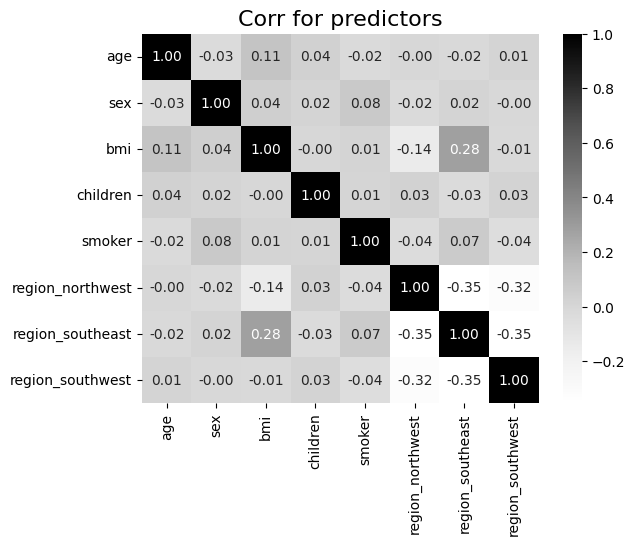

In [27]:
sns.heatmap(X.corr(), annot= True, fmt = '.2f', cmap = 'Greys')
plt.title("Corr for predictors", fontsize = 16)

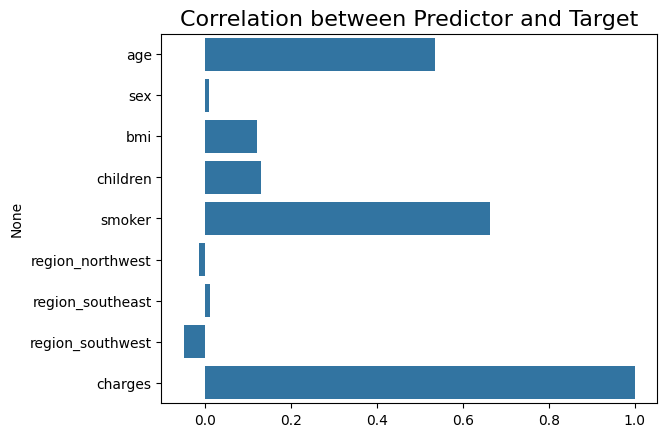

age                 0.535880
sex                 0.010094
bmi                 0.121857
children            0.131624
smoker              0.662331
region_northwest   -0.012861
region_southeast    0.011971
region_southwest   -0.048533
charges             1.000000
dtype: float64


In [28]:
#checking correlation  between target and predictor
temp_df = pd.concat([X,Y], axis = 1)
corrwith_price = temp_df.corrwith(temp_df['charges'], method= 'spearman')
sns.barplot(x = corrwith_price.values,
           y = corrwith_price.index)
plt.title("Correlation between Predictor and Target", fontsize = 16)
plt.show()
print(corrwith_price)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size= .8, random_state= 42, stratify= X['smoker'])
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [31]:
from sklearn.linear_model import LinearRegression, LassoCV, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# Linear Regression with Gradient Descent (SGD)
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', random_state=42)

# Original models (no change to these)
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

# Checking with some hyperparameters
lasso = LassoCV(cv=5, alphas=[0.001, 0.001, 0.01, 0.1, 1, 10])
knn1 = KNeighborsRegressor(n_neighbors=10, weights='distance')
svr1 = SVR(kernel='linear', degree=2)
rf1 = RandomForestRegressor(random_state=42, max_depth=10, n_estimators=500, oob_score=True, min_weight_fraction_leaf=1.3e-4)
gf = GradientBoostingRegressor(random_state=42, n_estimators=400, max_depth=8)
lr2 = LinearRegression()
knn2 = KNeighborsRegressor(n_neighbors=10, weights='distance')
svr2 = SVR(kernel='linear', degree=3)
rf2 = RandomForestRegressor(random_state=42, max_depth=10, n_estimators=500, oob_score=True, min_weight_fraction_leaf=1.3e-4)
gf2 = GradientBoostingRegressor(random_state=42, n_estimators=400, max_depth=8)

# Create a list of tuples with names and estimator objects
vote_estimators = [('lr', lr2), ('knn', knn2), ('rf', rf2), ('sgd', sgd)]  # Added SGD to the ensemble

# Pass the list of tuples to VotingRegressor
vote = VotingRegressor(estimators=vote_estimators)

stac_estimators = [('lr', lr2), ('rf', rf2)]

# Stacking with final estimator as KNN
stac = StackingRegressor(estimators=stac_estimators,
                         final_estimator=KNeighborsRegressor(n_neighbors=10, weights='distance'),
                         cv=5)


In [32]:
def create_df(data,models, cols):
    index = []
    for model in models:
        model_name = type(model).__name__
        if model_name in index:
            model_name = str(type(model).__name__) + '_hyp'
        index.append(model_name)

    df = pd.DataFrame(data = data,
                     index = index)
    df.rename(columns=dict(zip(df.columns, cols)), inplace=True)
    return df

def training(models, X=X_train, y=y_train):
    metric = {}
    train_model = []
    mses =[]
    maes =[]
    r2s =[]
    index =[]
    for model in models:
        #score = []  # Initialize score for each model
        model.fit(X, y)
        train_model.append(model)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)
        r2 = r2_score(y, y_pred)*100
        r2s.append(r2)
        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score

    cols=['train_mse', 'train_mae', 'train_r2']
    metric['mse'] = mses
    metric['mae'] = maes
    metric['r2'] = r2s
    metric_df = create_df(data=metric,models= train_model, cols = cols)
    return metric_df, train_model

def testing(models,X = X_test, y = y_test):
    mses =[]
    maes =[]
    r2s =[]
    index =[]
    metric = {}
    for model in models:
        #score = []  # Initialize score for each model
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mses.append(mse)
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)
        r2 = r2_score(y, y_pred)*100
        r2s.append(r2)
        #score.extend([mse, mae, r2])  # Use extend to add multiple elements to score
    metric['mse'] = mses
    metric['mae'] = maes
    metric['re'] = r2s
    cols=['test_mse', 'test_mae', 'test_r2']
    metric_df = create_df(data=metric,models= models, cols=cols)
    return metric_df

In [36]:
# Assuming SGDRegressor (Gradient Descent) and GradientBoostingRegressor are already defined as `sgd` and `gf`

# Add Gradient Descent (SGDRegressor) and Gradient Boosting models to the list
models = [lr, lasso, svr, svr1, knn, knn1, rf, rf1, gf, vote, stac, sgd]  # Added sgd and gf2

# Run the training function with the updated list of models
training_df, train_models = training(models)

# Display the training dataframe
training_df


,train_mse,train_mae,train_r2
LinearRegression,36313854.336,4132.008,75.630
LassoCV,36313854.336,4132.008,75.630
SVR,163253798.925,8350.434,-9.557
SVR_hyp,137456405.075,7233.314,7.755
KNeighborsRegressor,13358250.068,1977.037,91.036
KNeighborsRegressor_hyp,212259.438,24.786,99.858
RandomForestRegressor,1281720.573,500.330,99.140
RandomForestRegressor_hyp,3417529.257,916.321,97.707
GradientBoostingRegressor,212644.198,37.095,99.857
VotingRegressor,11069549.092,2239.458,92.571


In [37]:

test_df = testing(train_models)

test_df

,test_mse,test_mae,test_r2
LinearRegression,38796102.480,4371.399,72.682
LassoCV,38796103.676,4371.399,72.682
SVR,156689398.029,8171.898,-10.333
SVR_hyp,133031996.627,7113.520,6.326
KNeighborsRegressor,21816146.627,2727.093,84.638
KNeighborsRegressor_hyp,4469043.374,634.324,96.853
RandomForestRegressor,8548994.453,1453.575,93.980
RandomForestRegressor_hyp,10084047.300,1662.979,92.899
GradientBoostingRegressor,5732124.496,587.582,95.964
VotingRegressor,15204048.261,2632.463,89.294
